# Lead Score Assignment for X Education

## 1. Data Processing
#### Importing all needed Libraries

In [1]:
import pandas as pd, numpy as np, seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

#### Assign the dataframe for the csv files that we need to work on.

In [3]:
# Read the given CSV file, and view some sample records
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
def missing_percent(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Determining Cloumns that have above 95% of the same response (Yes/No)

for i in leads.columns:
    print(leads[i].value_counts(normalize=True))
    print('===================================')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Fo

14.0    0.352648
15.0    0.257467
13.0    0.154321
16.0    0.092991
17.0    0.069494
12.0    0.039028
11.0    0.018917
10.0    0.011350
9.0     0.001792
18.0    0.000996
8.0     0.000796
7.0     0.000199
Name: Asymmetrique Activity Score, dtype: float64
15.0    0.350259
18.0    0.213262
16.0    0.119275
17.0    0.115293
20.0    0.061330
19.0    0.048785
14.0    0.045002
13.0    0.040621
12.0    0.004381
11.0    0.001792
Name: Asymmetrique Profile Score, dtype: float64
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64
No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0

In [8]:
# Preparing the Droplist after determining the Irrelevant columns

droplist = ['Prospect ID', 'Lead Number', 'Do Not Call', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
leads[droplist].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Number                                    9240 non-null   int64 
 2   Do Not Call                                    9240 non-null   object
 3   Country                                        6779 non-null   object
 4   What matters most to you in choosing a course  6531 non-null   object
 5   Search                                         9240 non-null   object
 6   Magazine                                       9240 non-null   object
 7   Newspaper Article                              9240 non-null   object
 8   X Education Forums                             9240 non-null   object
 9   Newspaper                                      9240 non-null   

### 1.1 Dropping the Unnecessary variables (above 95% of Yes or No) and Irrelavant Features

In [9]:
leads = leads.drop(droplist, 1)

In [10]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   How did you hear about X Education      7033 non-null   object 
 10  What is your current occupation         6550 non-null   obje

### 1.2 Dealing with Select Values
Columns which have 'select' category meaning customer did not select any option. They are null values. And are replaced by NaN

In [11]:
leads = leads.replace('Select',np.NaN)

In [12]:
missing_percent(leads).sort_values('percentage', ascending=False)

,category,percentage
5,How did you hear about X Education,78.463203
9,Lead Profile,74.188312
8,Lead Quality,51.590909
11,Asymmetrique Activity Index,45.649351
12,Asymmetrique Profile Index,45.649351
13,Asymmetrique Activity Score,45.649351
14,Asymmetrique Profile Score,45.649351
10,City,39.707792
4,Specialization,36.580087
7,Tags,36.287879


In [13]:
# Dropping columns having missing values more than 40%
above_40 = list(round(100*(leads.isnull().sum()/len(leads.index)), 2)[round(100*(leads.isnull().sum()/len(leads.index)), 2) > 40].index)
leads = leads.drop(above_40, axis =1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [14]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

### 1.3 Transforming below columns of yes/no category to 1/0:

In [15]:
# List of variables to map

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [16]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### 1.4 Processing remaining colums one by one

In [17]:
leads['Lead Origin'].astype('category').value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [18]:
leads['Lead Origin'] = leads['Lead Origin'].replace(['Lead Import', 'Quick Add Form'],'Other Origins')

In [19]:
leads['Lead Source'].astype('category').value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
WeLearn              0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
blog                 0.000109
testone              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64

In [20]:
# Clubbing all the smaller sources to Othher
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

### Step 2: Visualising the Data and Dealing with Outliers
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Leads.

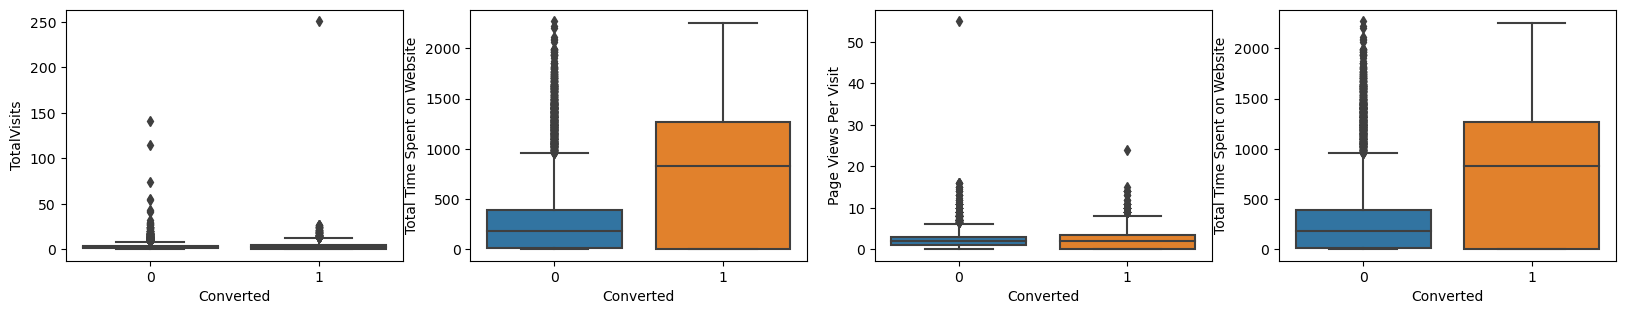

In [21]:
# Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sb.boxplot(x = 'Converted', y = 'TotalVisits', data = leads)

plt.subplot(4,4,2)
sb.boxplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.subplot(4,4,3)
sb.boxplot(x = 'Converted', y = 'Page Views Per Visit',data = leads)

plt.subplot(4,4,4)
sb.boxplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.show()

In [22]:
leads['TotalVisits'].quantile([.99, 1])

0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [23]:
leads[leads['TotalVisits'] > 17]
row_drop = list(leads[leads['TotalVisits'] > 17].index)
leads.drop(row_drop, inplace = True)

In [24]:
leads['Page Views Per Visit'].quantile([.99, 1])

0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64

In [25]:
leads[leads['Page Views Per Visit'] > 9]
row_drop = list(leads[leads['Page Views Per Visit'] > 9].index)
leads.drop(row_drop, inplace = True)

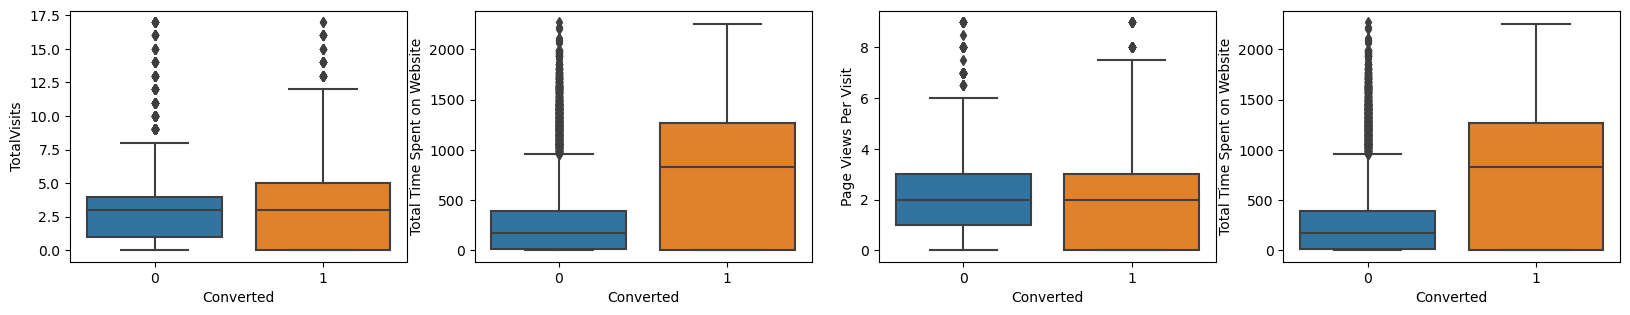

In [26]:
# Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sb.boxplot(x = 'Converted', y = 'TotalVisits', data = leads)

plt.subplot(4,4,2)
sb.boxplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.subplot(4,4,3)
sb.boxplot(x = 'Converted', y = 'Page Views Per Visit',data = leads)

plt.subplot(4,4,4)
sb.boxplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.show()

In [27]:
# Converting Float to Integer after the rounding the values
leads['TotalVisits'] = round(leads['TotalVisits'])
leads['TotalVisits'].fillna(value = 0,inplace = True)
leads['TotalVisits'] = leads['TotalVisits'].astype(int)

In [28]:
# Converting Float to Integer after the rounding the values
leads['Page Views Per Visit'] = round(leads['Page Views Per Visit'])
leads['Page Views Per Visit'].fillna(value = 0,inplace = True)
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].astype(int)

In [29]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,0,Modified
1,API,Organic Search,0,0,5,674,2,Email Opened,NaN,Unemployed,Ringing,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### 2.1 Factor Reduction/ Binning  Data

In [30]:
leads['Last Activity'].astype('category').value_counts(normalize=True)

Email Opened                    0.377212
SMS Sent                        0.301213
Olark Chat Conversation         0.107600
Page Visited on Website         0.066095
Converted to Lead               0.047624
Email Bounced                   0.036052
Email Link Clicked              0.029376
Form Submitted on Website       0.012685
Unreachable                     0.010126
Unsubscribed                    0.006676
Had a Phone Conversation        0.003227
Approached upfront              0.001001
View in browser link Clicked    0.000445
Email Received                  0.000223
Email Marked Spam               0.000223
Resubscribed to emails          0.000111
Visited Booth in Tradeshow      0.000111
Name: Last Activity, dtype: float64

In [31]:
# Grouping Last Activity into similar categories
leads['Last Activity'] = leads['Last Activity'].replace(['Email Bounced', 'Unsubscribed', 'Email Marked Spam'],'Unreachable')
leads['Last Activity'] = leads['Last Activity'].replace(['Email Link Clicked', 'Form Submitted on Website', 'View in browser link Clicked', 'Page Visited on Website', 'Approached upfront', 'Visited Booth in Tradeshow'],'Visited Website/Upfront')
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'Olark Chat Conversation'],'Phone/Chat Communication')
leads['Last Activity'] = leads['Last Activity'].replace(['Email Opened', 'Email Received', 'Resubscribed to emails'],'Email Communication')

In [32]:
leads['Last Activity'].astype('category').value_counts(normalize=True)

Email Communication         0.377545
SMS Sent                    0.301213
Phone/Chat Communication    0.110827
Visited Website/Upfront     0.109714
Unreachable                 0.053077
Converted to Lead           0.047624
Name: Last Activity, dtype: float64

In [33]:
#perform data binning on points variable with specific quantiles and labels
leads['TotalVisits'] = pd.qcut(leads['TotalVisits'], q=[0, 0.83, 0.97, 1], labels=['0 to 5', '6 to 10','10+'])

In [34]:
#perform data binning on points variable with specific quantiles and labels
leads['Session Time'] = pd.qcut(leads['Total Time Spent on Website'], q=[0, .252, 0.505, 0.6599, 0.7715, 1], labels=['0 to 10', '11 to 250','251-500', '501-1000', '1000+'])

In [35]:
leads['Session Time'].astype('category').value_counts(normalize=True)

11 to 250    0.252915
0 to 10      0.252145
1000+        0.228383
251-500      0.154895
501-1000     0.111661
Name: Session Time, dtype: float64

In [36]:
leads['Specialization'].astype('category').value_counts(normalize=True)

Finance Management                   0.167365
Human Resource Management            0.144852
Marketing Management                 0.144677
Operations Management                0.086911
Business Administration              0.068761
IT Projects Management               0.062827
Supply Chain Management              0.059511
Banking, Investment And Insurance    0.057243
Media and Advertising                0.034555
Travel and Tourism                   0.033159
International Business               0.030192
Healthcare Management                0.026702
Hospitality Management               0.019197
E-COMMERCE                           0.018848
Retail Management                    0.016579
Rural and Agribusiness               0.012216
E-Business                           0.009773
Services Excellence                  0.006632
Name: Specialization, dtype: float64

In [37]:
# Similar Specializations are clubbed together and Null Values are given Missing lable
leads['Specialization'] = leads['Specialization'].replace(['Finance Management', 'Banking, Investment And Insurance'],'Banking/Finance')
leads['Specialization'] = leads['Specialization'].replace(['Business Administration', 'International Business', 'E-COMMERCE', 'Rural and Agribusiness','E-Business'],'Business')
leads['Specialization'] = leads['Specialization'].replace(['Marketing Management', 'Media and Advertising'],'Marketing')
leads['Specialization'] = leads['Specialization'].replace(['Operations Management', 'Supply Chain Management', 'Retail Management'],'Production Management')
leads['Specialization'] = leads['Specialization'].replace(['Travel and Tourism', 'Healthcare Management', 'Hospitality Management'],'Healthcare & Hospitality')
leads['Specialization'] = leads['Specialization'].replace(['Human Resource Management', 'IT Projects Management', 'Services Excellence'],'HR & IT Services')

In [38]:
leads['Specialization'].astype('category').value_counts(normalize=True)

Banking/Finance             0.224607
HR & IT Services            0.214311
Marketing                   0.179232
Production Management       0.163002
Business                    0.139791
Healthcare & Hospitality    0.079058
Name: Specialization, dtype: float64

In [39]:
leads['What is your current occupation'].astype('category').value_counts(normalize=True)

Unemployed              0.855280
Working Professional    0.107764
Student                 0.032143
Other                   0.002174
Housewife               0.001553
Businessman             0.001087
Name: What is your current occupation, dtype: float64

In [40]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Housewife'],'Unemployed')
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Working Professional', 'Other', 'Businessman'],'Working')

In [41]:
leads['What is your current occupation'].astype('category').value_counts(normalize=True)

Unemployed    0.856832
Working       0.111025
Student       0.032143
Name: What is your current occupation, dtype: float64

In [42]:
leads['Tags'].astype('category').value_counts(normalize=True)

Will revert after reading the email                  0.352402
Ringing                                              0.203249
Interested in other courses                          0.087971
Already a student                                    0.079675
Closed by Horizzon                                   0.059972
switched off                                         0.040961
Busy                                                 0.031801
Lost to EINS                                         0.029554
Not doing further education                          0.023678
Interested  in full time MBA                         0.020221
Graduation in progress                               0.019011
invalid number                                       0.013999
Diploma holder (Not Eligible)                        0.010888
wrong number given                                   0.007950
opp hangup                                           0.005703
number not provided                                  0.004666
in touch

In [43]:
leads['Tags'] = leads['Tags'].replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month','Lateral student','In confusion whether part time or DLP','Interested in Next batch','Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given'],'Other')
leads['Tags'] = leads['Tags'].replace(['Diploma holder (Not Eligible)', 'invalid number', 'Not doing further education', 'Lost to EINS', 'Closed by Horizzon'],'Not Interested')
leads['Tags'] = leads['Tags'].replace(['Ringing', 'Busy', 'switched off'],'Unreachable')
leads['Tags'] = leads['Tags'].replace(['Already a student', 'Graduation in progress'],'Student')
leads['Tags'] = leads['Tags'].replace(['Interested  in full time MBA'],'Interested in other courses')

In [44]:
leads['Tags'].astype('category').value_counts(normalize=True)

Will revert after reading the email    0.352402
Unreachable                            0.276011
Not Interested                         0.138092
Interested in other courses            0.108192
Student                                0.098686
Other                                  0.026616
Name: Tags, dtype: float64

In [45]:
leads['Last Notable Activity'].astype('category').value_counts(normalize=True)

Modified                        0.369747
Email Opened                    0.306821
SMS Sent                        0.235754
Page Visited on Website         0.031683
Olark Chat Conversation         0.020022
Email Link Clicked              0.018702
Email Bounced                   0.006491
Unsubscribed                    0.005061
Unreachable                     0.003520
Had a Phone Conversation        0.001430
Email Marked Spam               0.000220
Approached upfront              0.000110
Email Received                  0.000110
Form Submitted on Website       0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Name: Last Notable Activity, dtype: float64

In [46]:
# Grouping Last Activity into similar categories
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Email Marked Spam'],'Unreachable')
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Link Clicked', 'Form Submitted on Website', 'View in browser link Clicked', 'Page Visited on Website', 'Approached upfront'],'Visited Website/Upfront')
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation', 'Olark Chat Conversation'],'Phone/Chat Communication')
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Opened', 'Email Received', 'Resubscribed to emails'],'Email Communication')

In [47]:
leads['Last Notable Activity'].astype('category').value_counts(normalize=True)

Modified                    0.369747
Email Communication         0.307041
SMS Sent                    0.235754
Visited Website/Upfront     0.050715
Phone/Chat Communication    0.021452
Unreachable                 0.015292
Name: Last Notable Activity, dtype: float64

In [48]:
missing_percent(leads).sort_values('percentage', ascending=False)

,category,percentage
5,City,40.121012
2,Specialization,36.963696
4,Tags,36.347635
3,What is your current occupation,29.152915
1,Last Activity,1.133113
0,Lead Source,0.396040


In [49]:
# Droping Categories with more than 40% missing values 
# Assigning missing values to suitable Lable
leads = leads.drop(['City','Total Time Spent on Website'], 1)
leads['Specialization'] = leads['Specialization'].replace(np.NaN,'Unknown')
leads['Tags'] = leads['Tags'].replace(np.NaN,'Unknown')
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Unknown')
leads['Last Activity'] = leads['Last Activity'].replace(np.NaN,'Unknown')
leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,'Google')

In [50]:
leads.rename(columns={'What is your current occupation': 'Ocupation', 'A free copy of Mastering The Interview': 'Free Booklet', 'Last Notable Activity':'Latest Activity'}, inplace=True)

In [51]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Page Views Per Visit,Last Activity,Specialization,Ocupation,Tags,Free Booklet,Latest Activity,Session Time
0,API,Olark Chat,0,0,0 to 5,0,Visited Website/Upfront,Unknown,Unemployed,Interested in other courses,0,Modified,0 to 10
1,API,Organic Search,0,0,0 to 5,2,Email Communication,Unknown,Unemployed,Unreachable,0,Email Communication,501-1000
2,Landing Page Submission,Direct Traffic,0,1,0 to 5,2,Email Communication,Business,Student,Will revert after reading the email,1,Email Communication,1000+
3,Landing Page Submission,Direct Traffic,0,0,0 to 5,1,Unreachable,Marketing,Unemployed,Unreachable,0,Modified,251-500
4,Landing Page Submission,Google,0,1,0 to 5,1,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,0,Modified,1000+


### 3. Feature selection for Machine Learning
    3.1 Greating the Dummie Variables 
    3.2 Split the dataset into train and test dataset and scaled the datasets.
    3.3 Plot a heatmap to check for highly correlated features

In [52]:
#Creating a dummy variables for 4 categories and dropping the first level. 
Dummies = ['Lead Origin', 'Lead Source','TotalVisits','Page Views Per Visit','Last Activity','Specialization','Ocupation','Tags','Latest Activity','Session Time']

#creating dummy variables data set
dummy = pd.get_dummies(leads[Dummies], drop_first=True)

# Adding these dummies to our original dataset
leads = pd.concat([leads,dummy],axis=1)

#dropping the duplicate columns
leads = leads.drop(Dummies, axis=1)

#viewing the dataset
leads.head()

,Do Not Email,Converted,Free Booklet,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other Origins,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,TotalVisits_6 to 10,TotalVisits_10+,Last Activity_Email Communication,Last Activity_Phone/Chat Communication,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Visited Website/Upfront,Specialization_Business,Specialization_HR & IT Services,Specialization_Healthcare & Hospitality,Specialization_Marketing,Specialization_Production Management,Specialization_Unknown,Ocupation_Unemployed,Ocupation_Unknown,Ocupation_Working,Tags_Not Interested,Tags_Other,Tags_Student,Tags_Unknown,Tags_Unreachable,Tags_Will revert after reading the email,Latest Activity_Modified,Latest Activity_Phone/Chat Communication,Latest Activity_SMS Sent,Latest Activity_Unreachable,Latest Activity_Visited Website/Upfront,Session Time_11 to 250,Session Time_251-500,Session Time_501-1000,Session Time_1000+
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [53]:
leads.shape

(9090, 43)

<AxesSubplot:>

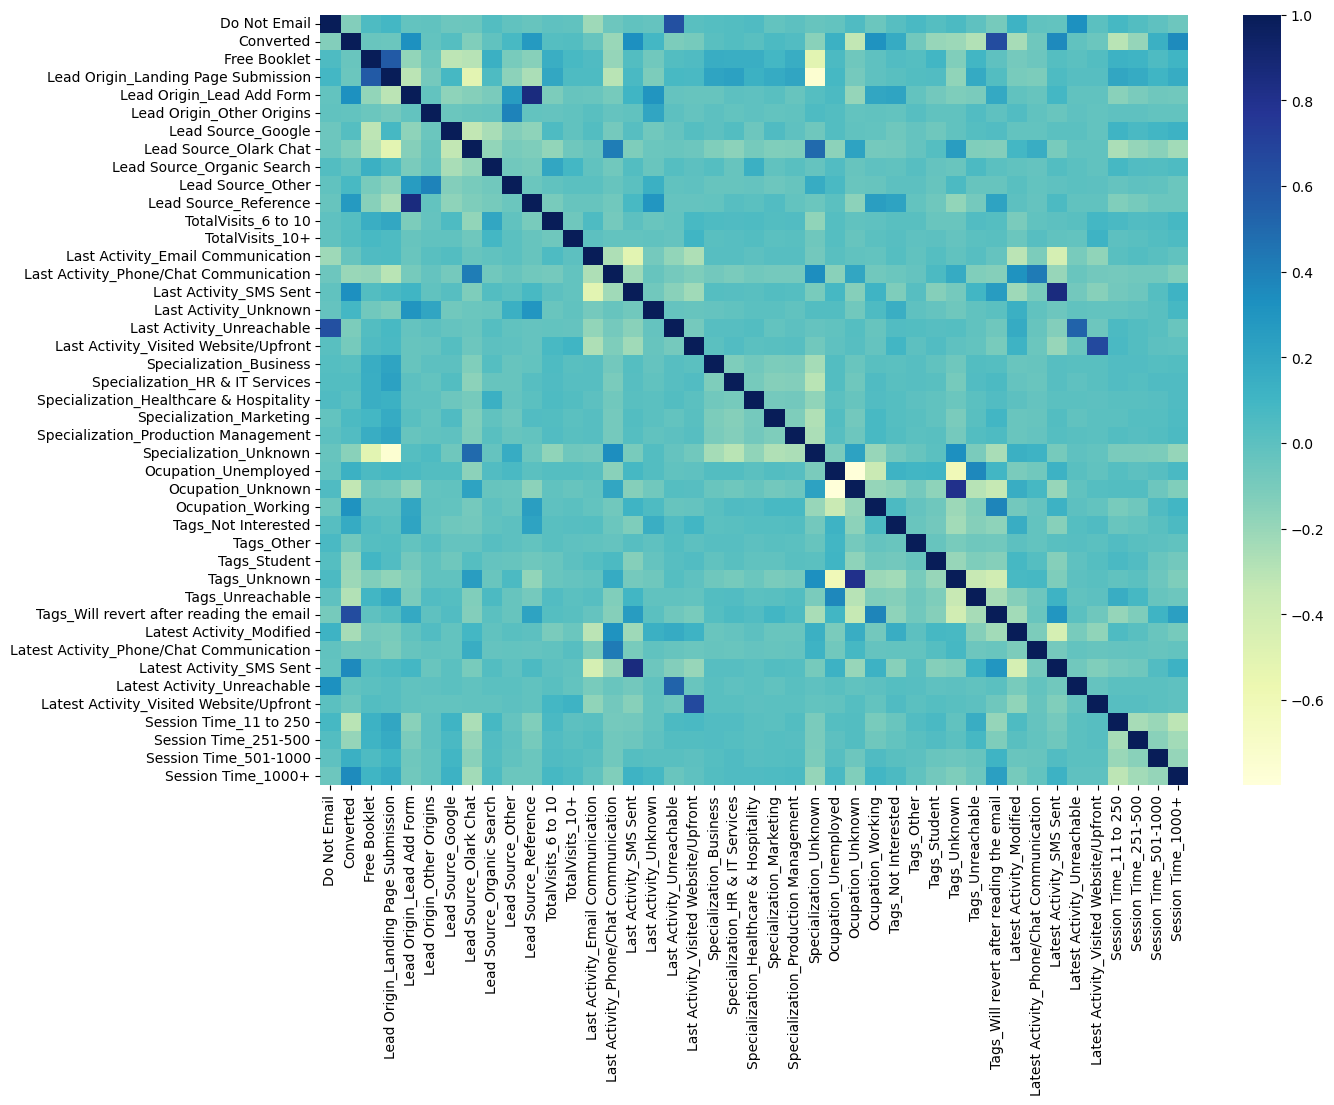

In [54]:
plt.figure(figsize=(14,10))
sb.heatmap(leads.corr(), cmap="YlGnBu")

In [55]:
leads.corr()

,Do Not Email,Converted,Free Booklet,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other Origins,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,TotalVisits_6 to 10,TotalVisits_10+,Last Activity_Email Communication,Last Activity_Phone/Chat Communication,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Visited Website/Upfront,Specialization_Business,Specialization_HR & IT Services,Specialization_Healthcare & Hospitality,Specialization_Marketing,Specialization_Production Management,Specialization_Unknown,Ocupation_Unemployed,Ocupation_Unknown,Ocupation_Working,Tags_Not Interested,Tags_Other,Tags_Student,Tags_Unknown,Tags_Unreachable,Tags_Will revert after reading the email,Latest Activity_Modified,Latest Activity_Phone/Chat Communication,Latest Activity_SMS Sent,Latest Activity_Unreachable,Latest Activity_Visited Website/Upfront,Session Time_11 to 250,Session Time_251-500,Session Time_501-1000,Session Time_1000+
Do Not Email,1.000000,-0.133269,0.054619,0.092187,-0.019455,-0.012366,-0.058965,-0.049292,0.035460,-0.013353,-0.037512,-0.007782,-0.014715,-0.216476,-0.054531,-0.013963,-0.031090,0.626137,0.016262,0.027097,0.034235,0.050526,-0.021900,-0.002225,-0.036024,-0.019493,0.048707,-0.051285,0.021551,0.066912,0.024698,0.060651,-0.009942,-0.093145,0.117926,-0.014648,-0.022913,0.325333,0.004015,0.086171,0.031209,-0.010361,-0.056231
Converted,-0.133269,1.000000,-0.042034,-0.052359,0.324947,-0.021766,0.026657,-0.130116,-0.012424,0.074087,0.273425,0.024821,0.036462,-0.034865,-0.203404,0.328455,0.088448,-0.110949,-0.094612,0.013582,0.037609,0.014369,0.064384,0.039390,-0.152670,0.134456,-0.327364,0.312567,0.165957,-0.072214,-0.195299,-0.210789,-0.281685,0.645696,-0.244189,-0.060833,0.354306,-0.013718,-0.049728,-0.303789,-0.191484,0.139112,0.347891
Free Booklet,0.054619,-0.042034,1.000000,0.568421,-0.180110,-0.052503,-0.319530,-0.292733,0.142120,-0.099066,-0.151214,0.145138,0.080259,0.047106,-0.186618,0.032707,-0.071391,0.033320,0.045600,0.153393,0.148517,0.146284,0.088745,0.155813,-0.507686,0.063681,-0.063297,-0.006272,0.041294,0.028804,0.094534,-0.128831,0.097340,-0.006643,-0.082722,-0.055967,0.027716,0.006243,0.032694,0.124101,0.108428,0.057944,0.102752
Lead Origin_Landing Page Submission,0.092187,-0.052359,0.568421,1.000000,-0.307426,-0.082713,0.085539,-0.513515,0.052234,-0.164955,-0.262195,0.190424,0.057201,0.056425,-0.300823,0.068787,-0.112469,0.074831,0.067794,0.207307,0.227969,0.135995,0.167141,0.202407,-0.749257,0.086158,-0.087396,-0.009099,0.011523,0.036196,0.038522,-0.176973,0.174323,0.031821,-0.100998,-0.109935,0.057446,0.018086,0.020220,0.193513,0.167622,0.108056,0.164167
Lead Origin_Lead Add Form,-0.019455,0.324947,-0.180110,-0.307426,1.000000,-0.023039,-0.169296,-0.140969,-0.108128,0.262819,0.852872,-0.113513,-0.038862,-0.044412,-0.088279,0.105741,0.304145,-0.028598,-0.036451,-0.037695,0.001359,-0.010750,0.012883,-0.035851,0.030413,0.063301,-0.187715,0.196486,0.207529,-0.022603,-0.075760,-0.116765,-0.107212,0.185088,-0.013619,-0.032060,0.093233,-0.013184,-0.017415,-0.153363,-0.103848,-0.062281,-0.070730
Lead Origin_Other Origins,-0.012366,-0.021766,-0.052503,-0.082713,-0.023039,1.000000,-0.047531,-0.038484,-0.029092,0.386968,-0.019650,-0.027419,-0.012572,0.011909,-0.027619,-0.014379,0.204103,0.000387,-0.027463,0.000324,-0.018777,-0.005109,-0.023658,-0.017383,0.053302,0.031681,-0.022663,-0.012559,-0.024441,0.022347,-0.014589,-0.012728,0.041236,-0.005263,0.038718,-0.011657,-0.040416,-0.009811,-0.018198,-0.010231,-0.010391,-0.018986,-0.019390
Lead Source_Google,-0.058965,0.026657,-0.319530,0.085539,-0.169296,-0.047531,1.000000,-0.332622,-0.251443,-0.133317,-0.169833,0.057687,-0.011438,0.034285,-0.086503,0.022877,-0.068381,-0.031792,0.028088,0.002071,0.032062,-0.056930,0.051518,-0.005151,-0.066368,0.032226,-0.011829,-0.020471,-0.063390,-0.025185,-0.066018,-0.014123,0.030173,0.040063,-0.019972,-0.022394,0.

In [56]:
# Create correlation matrix
corr_matrix = leads.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
# Drop features 
leads.drop(to_drop, axis=1, inplace=True)

### 4. Splitting the Data into Training and Testing Sets

In [57]:
# splitting the dataframe into Train and Test

np.random.seed(0)
leads_train, leads_test = train_test_split(leads, train_size = 0.7, random_state = 100)
print(leads_train.shape)
print(leads_test.shape)

(6363, 40)
(2727, 40)


In [58]:
# Building the Linear Model

y_train = leads_train.pop('Converted')
X_train = leads_train
y_test = leads_test.pop('Converted')
X_test = leads_test

In [59]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6363, 39)
X_test: (2727, 39)
y_train: (6363,)
y_test: (2727,)


## 5. Building model using statsmodel, for the detailed statistics

### Model 1:  With 20 features

In [60]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [61]:
# List of variables selected in top 20 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Free Booklet', False, 19),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other Origins', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Other', True, 1),
 ('TotalVisits_6 to 10', False, 6),
 ('TotalVisits_10+', True, 1),
 ('Last Activity_Email Communication', False, 12),
 ('Last Activity_Phone/Chat Communication', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unknown', False, 9),
 ('Last Activity_Unreachable', False, 8),
 ('Last Activity_Visited Website/Upfront', False, 16),
 ('Specialization_Business', False, 15),
 ('Specialization_HR & IT Services', False, 14),
 ('Specialization_Healthcare & Hospitality', True, 1),
 ('Specialization_Marketing', False, 18),
 ('Specialization_Production Management', False, 13),
 ('Specialization_Unknown', False, 20),
 ('Ocupation_Unemployed', False

In [62]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print("Selected Variables:", col)

Selected Variables: Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Origin_Other Origins', 'Lead Source_Olark Chat', 'Lead Source_Other', 'TotalVisits_10+', 'Last Activity_Phone/Chat Communication', 'Last Activity_SMS Sent', 'Specialization_Healthcare & Hospitality', 'Ocupation_Unknown', 'Tags_Not Interested', 'Tags_Other', 'Tags_Student', 'Tags_Unreachable', 'Tags_Will revert after reading the email', 'Latest Activity_Modified', 'Latest Activity_Phone/Chat Communication', 'Latest Activity_Visited Website/Upfront', 'Session Time_501-1000', 'Session Time_1000+'], dtype='object')


In [63]:
# List of Rejected columns
print('Rejected Columns:', X_train.columns[~rfe.support_])

Rejected Columns: Index(['Free Booklet', 'Lead Origin_Landing Page Submission', 'Lead Source_Google', 'Lead Source_Organic Search', 'TotalVisits_6 to 10', 'Last Activity_Email Communication', 'Last Activity_Unknown', 'Last Activity_Unreachable', 'Last Activity_Visited Website/Upfront', 'Specialization_Business', 'Specialization_HR & IT Services', 'Specialization_Marketing', 'Specialization_Production Management', 'Specialization_Unknown', 'Ocupation_Unemployed', 'Ocupation_Working', 'Latest Activity_Unreachable', 'Session Time_11 to 250', 'Session Time_251-500'], dtype='object')


In [64]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [65]:
X_train_new = X_train[col]
calculateVIF(X_train_new)

,Features,VIF
15,Latest Activity_Modified,2.07
6,Last Activity_Phone/Chat Communication,2.00
14,Tags_Will revert after reading the email,1.87
9,Ocupation_Unknown,1.73
7,Last Activity_SMS Sent,1.64
3,Lead Source_Olark Chat,1.58
19,Session Time_1000+,1.52
1,Lead Origin_Lead Add Form,1.42
16,Latest Activity_Phone/Chat Communication,1.39
10,Tags_Not Interested,1.37


In [66]:
# 1st linear regression model

X_train_lm1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     586.4
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        16:17:22   Log-Likelihood:                -1103.3
No. Observations:                6363   AIC:                             2249.
Df Residuals:                    6342   BIC:                             2391.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Model 2:  With 15 features

In [67]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [68]:
# List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Free Booklet', False, 24),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other Origins', False, 2),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Other', True, 1),
 ('TotalVisits_6 to 10', False, 11),
 ('TotalVisits_10+', False, 4),
 ('Last Activity_Email Communication', False, 17),
 ('Last Activity_Phone/Chat Communication', False, 6),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unknown', False, 14),
 ('Last Activity_Unreachable', False, 13),
 ('Last Activity_Visited Website/Upfront', False, 21),
 ('Specialization_Business', False, 20),
 ('Specialization_HR & IT Services', False, 19),
 ('Specialization_Healthcare & Hospitality', False, 5),
 ('Specialization_Marketing', False, 23),
 ('Specialization_Production Management', False, 18),
 ('Specialization_Unknown', False, 25),
 ('Ocupation_Unemployed'

In [69]:
# Selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print("Selected Variables:", col)

Selected Variables: Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Other', 'Last Activity_SMS Sent', 'Ocupation_Unknown', 'Tags_Not Interested', 'Tags_Other', 'Tags_Student', 'Tags_Unreachable', 'Tags_Will revert after reading the email', 'Latest Activity_Modified', 'Latest Activity_Phone/Chat Communication', 'Session Time_501-1000', 'Session Time_1000+'], dtype='object')


In [70]:
# List of Rejected columns

print('Rejected Columns:', X_train.columns[~rfe.support_])

Rejected Columns: Index(['Free Booklet', 'Lead Origin_Landing Page Submission', 'Lead Origin_Other Origins', 'Lead Source_Google', 'Lead Source_Organic Search', 'TotalVisits_6 to 10', 'TotalVisits_10+', 'Last Activity_Email Communication', 'Last Activity_Phone/Chat Communication', 'Last Activity_Unknown', 'Last Activity_Unreachable', 'Last Activity_Visited Website/Upfront', 'Specialization_Business', 'Specialization_HR & IT Services', 'Specialization_Healthcare & Hospitality', 'Specialization_Marketing', 'Specialization_Production Management', 'Specialization_Unknown', 'Ocupation_Unemployed', 'Ocupation_Working', 'Latest Activity_Unreachable', 'Latest Activity_Visited Website/Upfront', 'Session Time_11 to 250', 'Session Time_251-500'], dtype='object')


In [71]:
X_train_new = X_train[col]
calculateVIF(X_train_new)

,Features,VIF
10,Tags_Will revert after reading the email,1.83
11,Latest Activity_Modified,1.69
5,Ocupation_Unknown,1.65
4,Last Activity_SMS Sent,1.58
14,Session Time_1000+,1.51
2,Lead Source_Olark Chat,1.39
1,Lead Origin_Lead Add Form,1.38
6,Tags_Not Interested,1.33
9,Tags_Unreachable,1.25
13,Session Time_501-1000,1.23


In [72]:
# 1st linear regression model

X_train_lm2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     775.9
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        16:17:22   Log-Likelihood:                -1120.7
No. Observations:                6363   AIC:                             2273.
Df Residuals:                    6347   BIC:                             2382.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Model 3: WIth 10 Features

In [73]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [74]:
# List of variables selected in top 10 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 4),
 ('Free Booklet', False, 29),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other Origins', False, 7),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Other', False, 2),
 ('TotalVisits_6 to 10', False, 16),
 ('TotalVisits_10+', False, 9),
 ('Last Activity_Email Communication', False, 22),
 ('Last Activity_Phone/Chat Communication', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unknown', False, 19),
 ('Last Activity_Unreachable', False, 18),
 ('Last Activity_Visited Website/Upfront', False, 26),
 ('Specialization_Business', False, 25),
 ('Specialization_HR & IT Services', False, 24),
 ('Specialization_Healthcare & Hospitality', False, 10),
 ('Specialization_Marketing', False, 28),
 ('Specialization_Production Management', False, 23),
 ('Specialization_Unknown', False, 30),
 ('Ocupation_Unemp

In [75]:
# Selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print("Selected Variables:", col)

Selected Variables: Index(['Lead Origin_Lead Add Form', 'Last Activity_SMS Sent', 'Ocupation_Unknown', 'Tags_Not Interested', 'Tags_Other', 'Tags_Student', 'Tags_Unreachable', 'Tags_Will revert after reading the email', 'Session Time_501-1000', 'Session Time_1000+'], dtype='object')


In [76]:
# List of Rejected columns

print('Rejected Columns:', X_train.columns[~rfe.support_])

Rejected Columns: Index(['Do Not Email', 'Free Booklet', 'Lead Origin_Landing Page Submission', 'Lead Origin_Other Origins', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other', 'TotalVisits_6 to 10', 'TotalVisits_10+', 'Last Activity_Email Communication', 'Last Activity_Phone/Chat Communication', 'Last Activity_Unknown', 'Last Activity_Unreachable', 'Last Activity_Visited Website/Upfront', 'Specialization_Business', 'Specialization_HR & IT Services', 'Specialization_Healthcare & Hospitality', 'Specialization_Marketing', 'Specialization_Production Management', 'Specialization_Unknown', 'Ocupation_Unemployed', 'Ocupation_Working', 'Latest Activity_Modified', 'Latest Activity_Phone/Chat Communication', 'Latest Activity_Unreachable', 'Latest Activity_Visited Website/Upfront', 'Session Time_11 to 250', 'Session Time_251-500'], dtype='object')


In [77]:
X_train_new = X_train[col]
calculateVIF(X_train_new)

,Features,VIF
4,Tags_Other,1.01
0,Lead Origin_Lead Add Form,0.61
5,Tags_Student,0.37
8,Session Time_501-1000,0.36
7,Tags_Will revert after reading the email,0.18
9,Session Time_1000+,0.17
3,Tags_Not Interested,0.12
6,Tags_Unreachable,0.11
1,Last Activity_SMS Sent,0.08
2,Ocupation_Unknown,0.05


In [78]:
# 1st linear regression model

X_train_lm3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1061.
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        16:17:23   Log-Likelihood:                -1309.9
No. Observations:                6363   AIC:                             2642.
Df Residuals:                    6352   BIC:                             2716.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### The change for 20 vs 15 variables is very low compared to 15 vs 10 variables. For a simpler model with less variables not so different  compared to 15 variable model lr_3 with 10 variables is choosen

In [79]:
# checking all the coefficients
lr_3.params.sort_values(ascending=False)

Tags_Will revert after reading the email    0.452991
Lead Origin_Lead Add Form                   0.295881
Session Time_1000+                          0.255081
Tags_Not Interested                         0.226839
const                                       0.226281
Last Activity_SMS Sent                      0.186964
Session Time_501-1000                       0.183918
Ocupation_Unknown                          -0.186038
Tags_Student                               -0.252079
Tags_Other                                 -0.259135
Tags_Unreachable                           -0.279021
dtype: float64

## 6. Model Evaluation: Predicting the train dataset with model 3

In [80]:
# Predicting train dataset with final model

y_train_pred=lr_3.predict(X_train_lm3)
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,})
y_train_pred_final.head()

,Converted,Converted_probability
302,0,0.040243
6087,0,0.040243
1033,0,0.226281
7656,0,0.134225
3241,1,1.050155


In [81]:
# Importing necessary libraries for ROC curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot ROC and AUC for the ploted curve

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve(actual,probability,drop_intermediate=False )   
      
    auc_score = roc_auc_score( actual, probability )                       # Calculating the AUC score  
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )     # Plotting the ROC curve
    
    plt.plot([0, 1], [0, 1], 'r--')                                        # Plotting the 45% dotted line
    
    plt.title('Receiver Operating Characteristic')                         # Plot heading 
    plt.xlabel('False Positive Rate')                                      # X-label
    plt.ylabel('True Positive Rate')                                       # Y-label
    plt.legend(loc="lower right")
    plt.show()

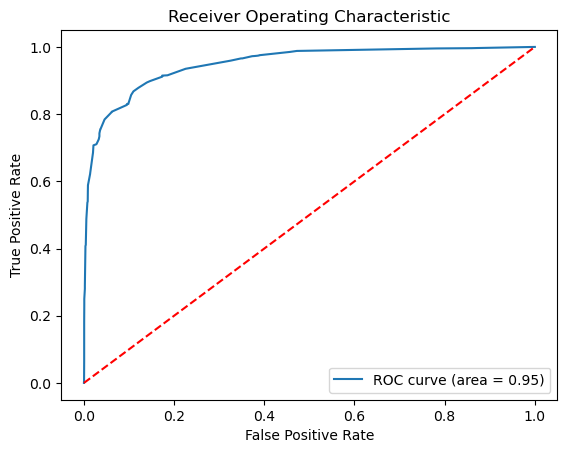

In [82]:
# Calling the roc curve function for plotting

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [83]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)  
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.040243,1,0,0,0,0,0,0,0,0,0
6087,0,0.040243,1,0,0,0,0,0,0,0,0,0
1033,0,0.226281,1,1,1,0,0,0,0,0,0,0
7656,0,0.134225,1,1,0,0,0,0,0,0,0,0
3241,1,1.050155,1,1,1,1,1,1,1,1,1,1


In [84]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# Probabilities

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total = sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy = (cm_matrix[0,0]+cm_matrix[1,1])/total                                      
    sensitivity = cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         
    specificity = cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                        
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)  

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.515009    0.995470     0.218551
0.1          0.1  0.703442    0.988056     0.527827
0.2          0.2  0.758762    0.972405     0.626938
0.3          0.3  0.870658    0.898270     0.853621
0.4          0.4  0.878516    0.879325     0.878018
0.5          0.5  0.883860    0.754119     0.963914
0.6          0.6  0.874745    0.724876     0.967217
0.7          0.7  0.847713    0.623147     0.986277
0.8          0.8  0.818953    0.538715     0.991868
0.9          0.9  0.771806    0.407331     0.996696


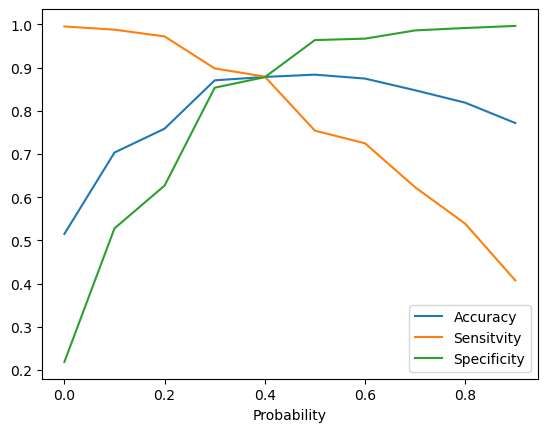

In [85]:
# Ploting Accuracy, Sensitivity and Specificity

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

In [86]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
302,0,0.040243,1,0,0,0,0,0,0,0,0,0,0
6087,0,0.040243,1,0,0,0,0,0,0,0,0,0,0
1033,0,0.226281,1,1,1,0,0,0,0,0,0,0,0
7656,0,0.134225,1,1,0,0,0,0,0,0,0,0,0
3241,1,1.050155,1,1,1,1,1,1,1,1,1,1,1


In [87]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[3359,  576],
       [ 247, 2181]], dtype=int64)

In [88]:
from sklearn import metrics
# Sensitivity score
Sensitivity_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

# Specificity score
Specificity_train = round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

# Accuracy for train dataset 
Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)

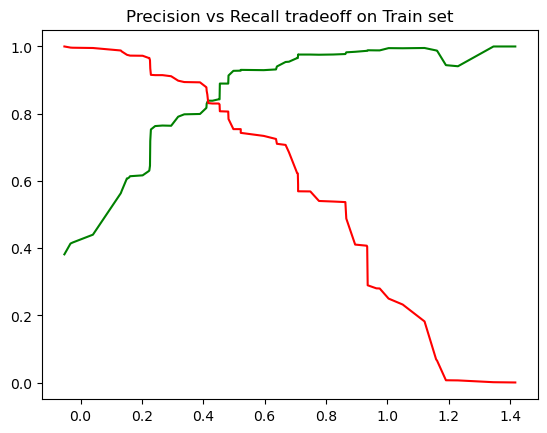

In [89]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

## 7 Prediction on the test dataset

In [90]:
# Predicting the test dataset with our final model

test_cols = X_train_lm3.columns[1:]              # Taking the same column train set has
X_test_final = X_test[test_cols]               # Updating it in the final test set
X_test_final = sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test = lr_3.predict(X_test_final)      # Predicting the final test set

In [91]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability
6906,1,1.121318
1873,0,0.413246
771,0,-0.052740
4495,0,-0.052740
9061,1,0.522164


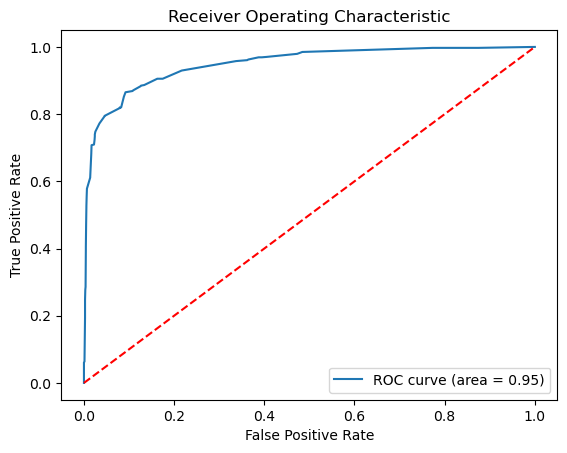

In [92]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

In [93]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,Predicted
6906,1,1.121318,1
1873,0,0.413246,1
771,0,-0.052740,0
4495,0,-0.052740,0
9061,1,0.522164,1


In [94]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1438,  222],
       [ 121,  946]], dtype=int64)

In [95]:
# Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

# Specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

# Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

# Checking test set accuracy
Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)

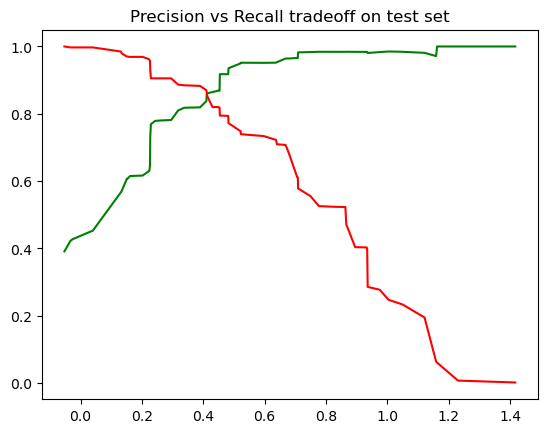

In [96]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [97]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  84.65324384787472


In [98]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test)
print('Precision:',Precision_test) 
print('Accuracy:',Accuracy_test)

Train Data Set metrics:

Sensitivity: 89.83
Specificity: 85.36
Precision: 79.11
Accuracy: 87.07

Test Data Set metrics:

Sensitivity: 88.66
Specificity: 86.63
Precision: 80.99
Accuracy: 87.42


In [99]:
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final['Lead Score']=y_test_pred_final['Lead Score'].map(lambda x:100 if x >100 else 0 if x<0 else x)
y_test_pred_final.head()

,Converted,Converted_Probability,Predicted,Lead Score
6906,1,1.121318,1,100
1873,0,0.413246,1,41
771,0,-0.052740,0,0
4495,0,-0.052740,0,0
9061,1,0.522164,1,52


In [100]:
y_test_pred_final['Lead Score'].describe()

count    2727.000000
mean       37.764576
std        35.674925
min         0.000000
25%         4.000000
50%        23.000000
75%        68.000000
max       100.000000
Name: Lead Score, dtype: float64

In [101]:
High_Lead_Score = list(y_test_pred_final[y_test_pred_final['Lead Score'] >= 80].index)
High_Lead_Score.sort()

In [102]:
# Check the features with Lead score and focus on those leads with high features counts (columns) of the following list
high_df = leads.loc[High_Lead_Score]
high_df_sum = high_df.sum()
print(high_df_sum)

Do Not Email                                 20
Converted                                   559
Free Booklet                                164
Lead Origin_Landing Page Submission         285
Lead Origin_Lead Add Form                   134
Lead Origin_Other Origins                     3
Lead Source_Google                          191
Lead Source_Olark Chat                       36
Lead Source_Organic Search                   60
Lead Source_Other                            13
TotalVisits_6 to 10                          75
TotalVisits_10+                              14
Last Activity_Email Communication           165
Last Activity_Phone/Chat Communication       11
Last Activity_SMS Sent                      327
Last Activity_Unknown                        24
Last Activity_Unreachable                    12
Last Activity_Visited Website/Upfront        23
Specialization_Business                      57
Specialization_HR & IT Services              93
Specialization_Healthcare & Hospitality 

In [103]:
# Check the features with low lead score and avoid those leads with following features with high count (column)
Low_Lead_Score = list(y_test_pred_final[y_test_pred_final['Lead Score'] <= 20].index)
low_df = leads.loc[Low_Lead_Score]
low_df_sum = low_df.sum()
print(low_df_sum)

Do Not Email                                106
Converted                                    40
Free Booklet                                375
Lead Origin_Landing Page Submission         595
Lead Origin_Lead Add Form                     0
Lead Origin_Other Origins                     6
Lead Source_Google                          304
Lead Source_Olark Chat                      301
Lead Source_Organic Search                  119
Lead Source_Other                            29
TotalVisits_6 to 10                         131
TotalVisits_10+                              28
Last Activity_Email Communication           492
Last Activity_Phone/Chat Communication      174
Last Activity_SMS Sent                      144
Last Activity_Unknown                         2
Last Activity_Unreachable                    75
Last Activity_Visited Website/Upfront       136
Specialization_Business                      78
Specialization_HR & IT Services             131
Specialization_Healthcare & Hospitality 

## Conclusion

    1. Top Three Important features responsible for conversion rate are :
    - Tags
    - Lead Origin
    - Session Time (Total Time Spent on Website)
      
    2. Top 3 categorical/dummy variables which should be focused the most are:
    - Tags: Will revert after reading the email
    - Lead Origin: Lead Add Form
    - Session Time_1000+ (Total Time Spent on Website)
    
    3. To make the lead conversion more aggressive focus on the leads with high Lead Score.
    - Contact Leads with high Lead Score first
    - Then the ones with moderately High Lead score and so on 
    - Avoide the Leads with Less lead score
    
    4. To minimize the rate of useless phone calls avoid the following categories which have high negative correlation
    - Lead Origin_Landing Page Submission
    - Ocupation_Unemployed
    - Ocupation_Unknown
    - Last Activity_Email Communication
    - Specialization_Unknown
    - Session Time_11 to 250
    - Free Booklet